# CIFAR Noise Reduction using Autoencoders

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape,MaxPooling2D,UpSampling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import cv2

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() 

In [3]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_test = X_test[y_test.ravel()==8]
X_train = X_train[y_train.ravel()==8]

In [4]:
print(X_train.shape)
print(X_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)


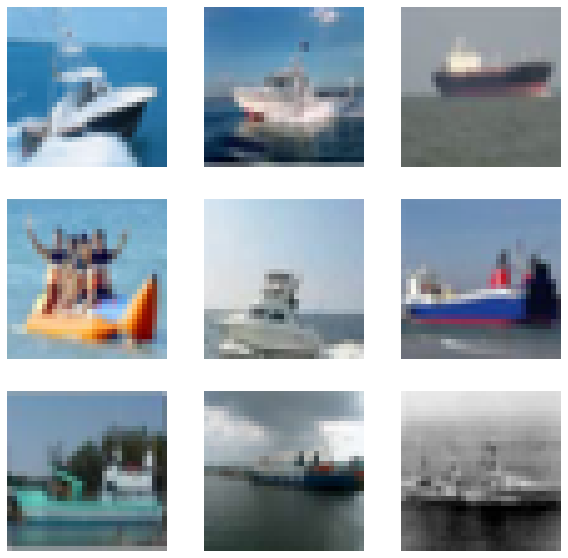

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i])
  plt.axis("off")

### Introduction of Gaussian Noise

In [6]:
noise_ratio = 0.06

In [7]:
X_train_g_noisy= X_train/255. + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_g_noisy= X_test/255. + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)

In [8]:
X_train_noisy=np.clip(X_train_g_noisy, 0., 1.)
X_test_noisy=np.clip(X_test_g_noisy, 0., 1.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


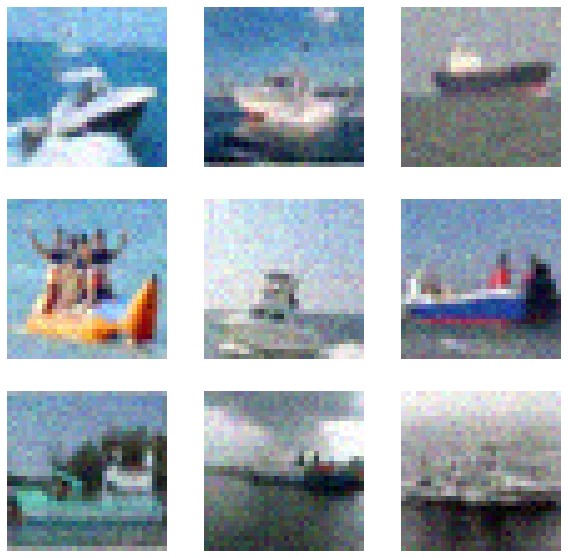

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train_g_noisy[i])
  plt.axis("off")

In [10]:
train_data = X_train / 255.0
test_data = X_test / 255.0

## Model Architecture

In [11]:
modelg = Sequential()
modelg.add(Dense(1500, input_dim = 3072, activation='relu'))
modelg.add(Dense(1200, activation = 'relu'))
modelg.add(Dense(900, activation = 'relu'))
modelg.add(Dense(600, activation = 'relu'))
modelg.add(Dense(900, activation = 'relu'))
modelg.add(Dense(1200, activation = 'relu'))
modelg.add(Dense(1500, activation = 'relu'))
modelg.add(Dense(3072, activation = 'sigmoid'))

In [12]:
modelg.compile(optimizer='adam',loss='mse')
modelg_early_stop = EarlyStopping(monitor='loss',patience=3)

In [13]:
modelg_trained = modelg.fit(X_train_g_noisy.reshape(5000,3072), train_data.reshape(5000,3072), validation_split=0.1, epochs=50, batch_size=32, callbacks = [modelg_early_stop])

Epoch 1/50
141/141 [==============================] - 11s 74ms/step - loss: 0.0452 - val_loss: 0.0382
Epoch 2/50
141/141 [==============================] - 10s 72ms/step - loss: 0.0362 - val_loss: 0.0320
Epoch 3/50
141/141 [==============================] - 10s 73ms/step - loss: 0.0323 - val_loss: 0.0286
Epoch 4/50
141/141 [==============================] - 10s 73ms/step - loss: 0.0288 - val_loss: 0.0273
Epoch 5/50
141/141 [==============================] - 10s 74ms/step - loss: 0.0281 - val_loss: 0.0274
Epoch 6/50
141/141 [==============================] - 10s 69ms/step - loss: 0.0279 - val_loss: 0.0274
Epoch 7/50
141/141 [==============================] - 10s 74ms/step - loss: 0.0278 - val_loss: 0.0264
Epoch 8/50
141/141 [==============================] - 10s 74ms/step - loss: 0.0261 - val_loss: 0.0252
Epoch 9/50
141/141 [==============================] - 11s 76ms/step - loss: 0.0257 - val_loss: 0.0252
Epoch 10/50
141/141 [==============================] - 11s 76ms/step - loss: 0.025

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


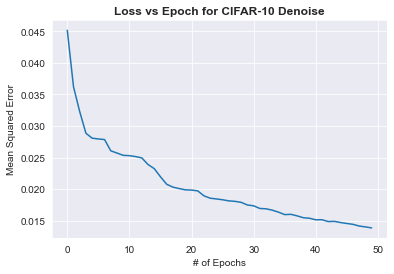

In [29]:
sns.set_style('darkgrid')
sns.lineplot(modelg_trained.epoch,modelg_trained.history['loss'])
plt.title('Loss vs Epoch for CIFAR-10 Denoise', weight='bold')
plt.xlabel('# of Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [15]:
resultg = modelg.predict(X_test_noisy.reshape(1000,3072))
print(resultg.shape)

(1000, 3072)


In [16]:
resultg = resultg.reshape(1000,32,32,3)

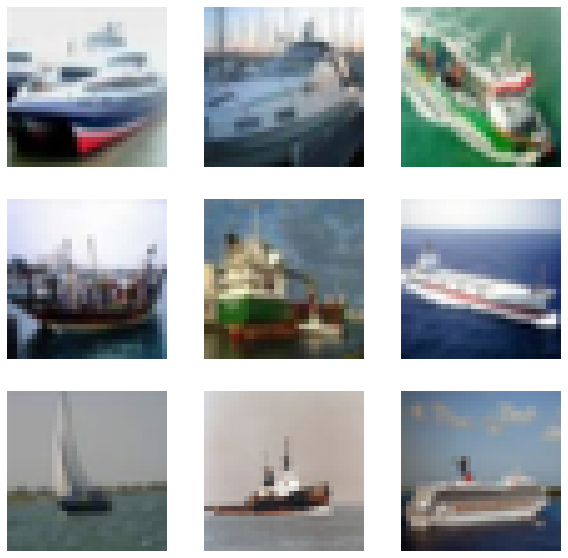

In [17]:
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[i])
  plt.axis("off")

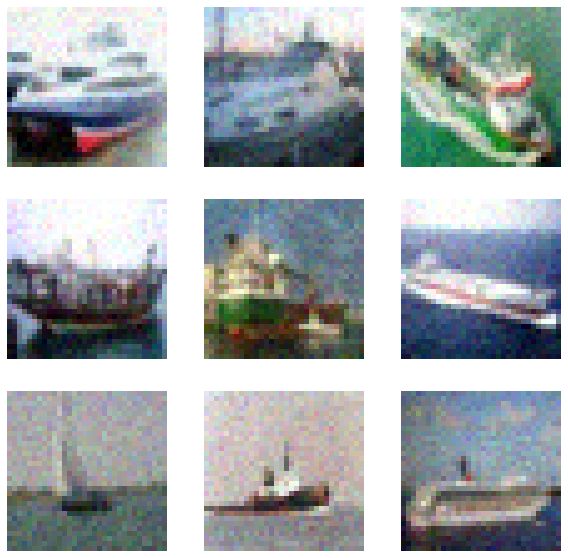

In [18]:
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_test_noisy[i])
  plt.axis("off")

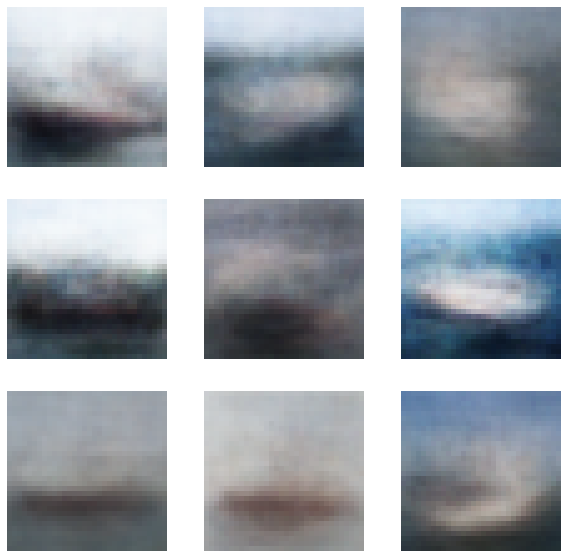

In [19]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((resultg[i]))
  plt.axis("off")

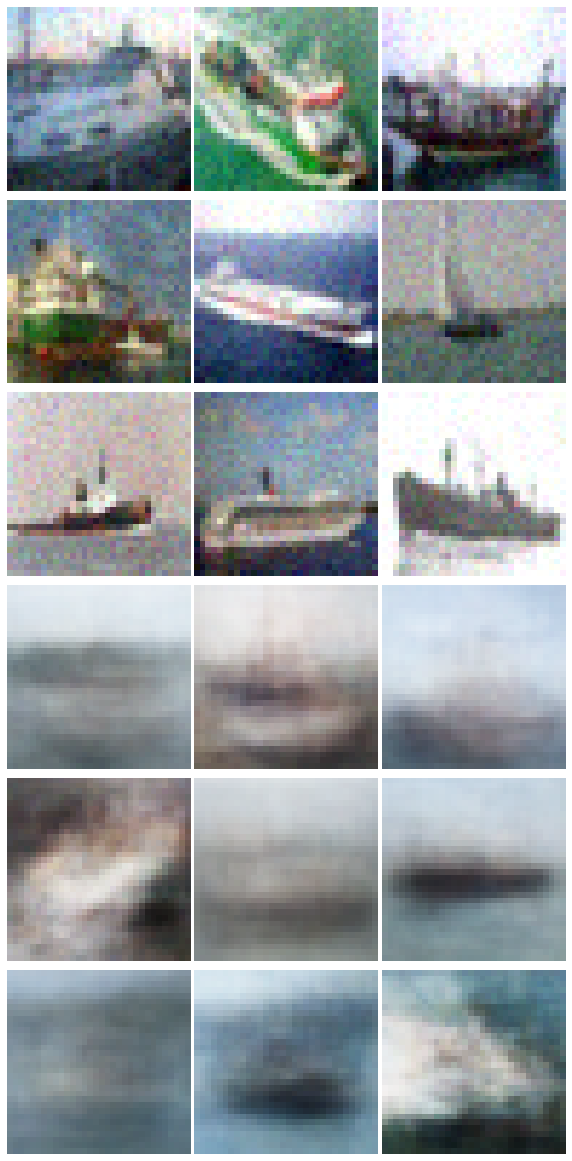

In [28]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=0.02)
for i in range(1,10):
  ax = plt.subplot(6, 3, i )
  plt.imshow(X_test_noisy[i])
  plt.axis("off")
for i in range(10, 19):
  ax = plt.subplot(6, 3, i)
  plt.imshow(resultg[i])
  plt.axis("off")

### Inference

We notice that the images produced by this model have learnt features such as color of water, air and in general about the ship's color. But we notice that the images do not have gaussian noise which is what we are looking for. But there is a lot of distortion in the output. This is because we have used a very small dataset of only 5000 images from the CIFAR-10. 

This can be fixed by using a larger training dataset. Using the entire CIFAR 10 would lead to erroneous results as we have seen in the CIFAR Colorify Task. The characteristics are very specific to the classes and CIFAR 10 has a lot of varying classes.